In [1]:
#Задание 1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
#data1 = pd.read_csv('weights_heights.csv', index_col='Index')

In [4]:
data.head(5)

Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971

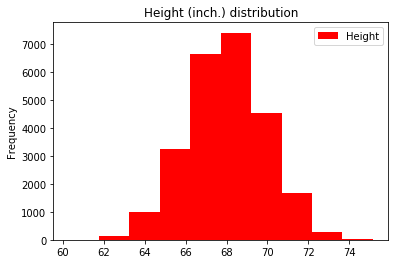

In [5]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

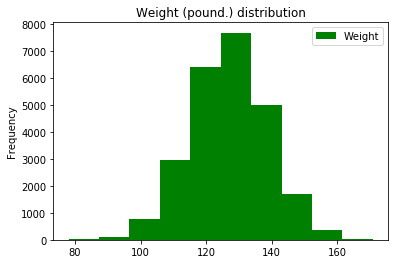

In [6]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (pound.) distribution')

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [9]:
data.head(5)

Height    Weight        BMI
Index                               
1      65.78331  112.9925  18.357573
2      71.51521  136.4873  18.762577
3      69.39874  153.0269  22.338895
4      68.21660  142.3354  21.504526
5      67.78781  144.2971  22.077581

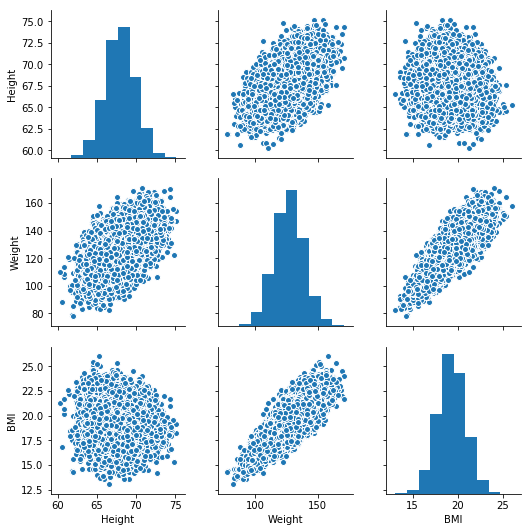

In [10]:
sns.pairplot(data)

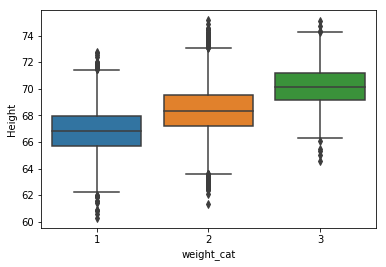

In [11]:
def weight_category(weight):
    if float(weight) < 120:
        return 1
    elif float(weight) >= 150:
        return 3
    else:
        return 2   

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=data)

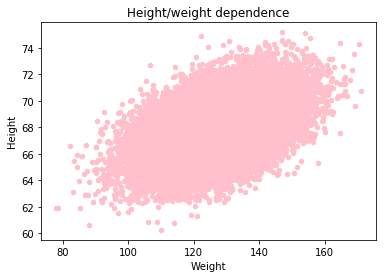

In [12]:
data.plot(x='Weight',y='Height', kind='scatter', color='pink', title='Height/weight dependence')

In [13]:
# Задание 2

In [14]:
def error_(w_0,w_1):
    s_ = 0
    for index, row in data.iterrows():
        s_ += (row['Height']-(w_0 + w_1*row['Weight']))**2
    return s_

In [15]:
error_(50,0.14)

79997.73683208317

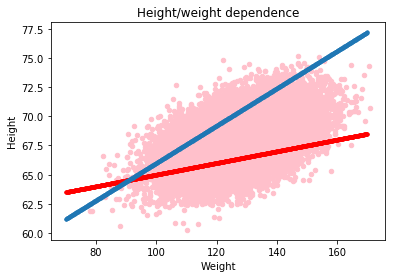

In [16]:
data.plot(x='Weight',y='Height', kind='scatter', color='pink', title='Height/weight dependence')
n = 1000
x1 = np.linspace(70, 170, n, endpoint=True)
#y1 = 0.05*x1+60
plt.plot(x1, 0.05*x1+60, '.', color='red')
plt.plot(x1, 0.16*x1+50, '.')
plt.show()

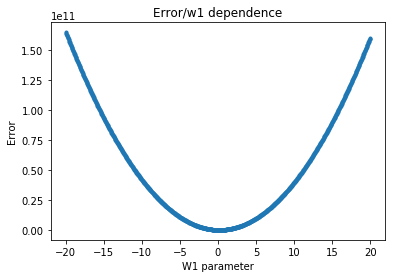

In [17]:
n = 1000
w1 = np.linspace(-20, 20, n, endpoint=True)
plt.plot(w1, error_(50, w1), '.')
plt.title('Error/w1 dependence')
plt.xlabel('W1 parameter')
plt.ylabel('Error')
plt.show()

In [18]:
from scipy.optimize import minimize_scalar
w_0 = 50
#w1_opt = minimize_scalar(error_, args=(w_0), bounds=(-5, 5))
w1_opt = minimize_scalar(lambda w_1: error_(w_0,w_1), bounds=(-5,5))

In [19]:
w1_opt.x

0.14109203728834385

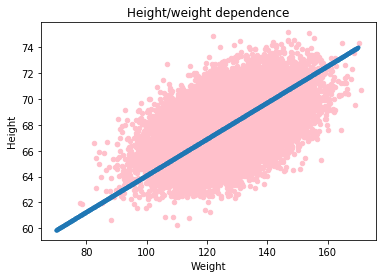

In [20]:
data.plot(x='Weight',y='Height', kind='scatter', color='pink', title='Height/weight dependence')
n = 1000
x1 = np.linspace(70, 170, n, endpoint=True)
plt.plot(x1, w1_opt.x*x1+50, '.')
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D

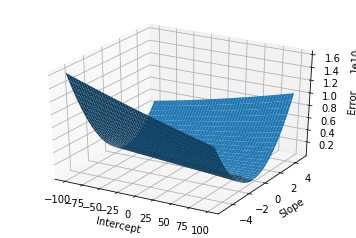

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-100, 100, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = error_(X, Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [23]:
from scipy.optimize import minimize

In [28]:
def error(w):
    s_ = 0
    for index, row in data.iterrows():
        s_ += (row['Height']-(w[0] + w[1]*row['Weight']))**2
    return s_

In [29]:
x0 = np.array([0, 0])
w_opt = minimize(error, x0, method='L-BFGS-B', bounds=((-100,100),(-5,5)))

In [30]:
w_opt

      fun: 67545.28708721547
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.33760443, 37.66763257])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 12
   status: 0
  success: True
        x: array([57.57178736,  0.08200645])

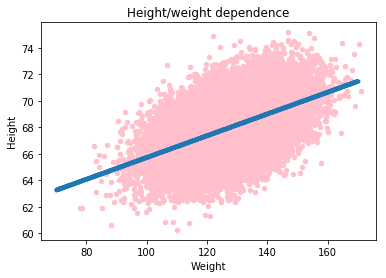

In [32]:
data.plot(x='Weight',y='Height', kind='scatter', color='pink', title='Height/weight dependence')
n = 1000
x1 = np.linspace(70, 170, n, endpoint=True)
plt.plot(x1, w_opt.x[1]*x1+ w_opt.x[0], '.')
plt.show()